### 0: IMPORTING LIBRARIES 

In [3]:
!pip install matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 497.1 kB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 314.6 kB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 291.9 kB/s eta 0:00:00a 0:00:02
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8/8 [matplotlib]8 [matplotlib]


In [4]:
import json
import pprint
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict

Matplotlib is building the font cache; this may take a moment.


### 1: ADD TRANSLATION COLUMN FROM ANOTHER FILE

This script reads the first 30 lines from an extra JSONL file and adds a new column to the first 30 rows of a main JSONL file. The new column is populated with values from the extra file.


In [ ]:
# Insert the path to your files here. 
main_file = '/Users/alessioborgi/GitHub/AMT-AutomaticMachineTranslation/gold_labels_first30s.jsonl'
extra_file = '/Users/alessioborgi/GitHub/AMT-AutomaticMachineTranslation/results/llm_based/re-act_prompting/BorgiNonModernToModern-hw2_transl-llama-fewshot-react.jsonl'
new_field = 'llama_translation_fewshot-react'  # Name of the new column to add.
extra_field = 'llama_translation'              # Field to read from extra_file.

# Read the first 30 values from the extra file.
extra_values = []
with open(extra_file, 'r', encoding='utf-8') as f:
    for i, line in enumerate(f):
        if i >= 30:
            break
        try:
            data = json.loads(line)
            extra_values.append(data[extra_field])
        except json.JSONDecodeError as e:
            print(f"Error in line {i}: {line}")
            raise e

# Ensure we have at least 30 valid entries in extra_values.
if len(extra_values) < 30:
    print(len(extra_values))
    raise ValueError('extra.jsonl contains fewer than 30 valid lines!')

# Read main.jsonl and update first 30 rows with new column.
main_rows = []
with open(main_file, 'r', encoding='utf-8') as f:
    for i, line in enumerate(f):
        row = json.loads(line)
        if i < 30:
            row[new_field] = extra_values[i]
        main_rows.append(row)

# Overwrite main.jsonl with updated content.
with open(main_file, 'w', encoding='utf-8') as f:
    for row in main_rows:
        f.write(json.dumps(row, ensure_ascii=False) + '\n')

print(f"Added column '{new_field}' to the first 30 lines in '{main_file}' using values from '{extra_file}'.")


Added column 'llama_translation_fewshot-react' to the first 30 lines in '/Users/alessioborgi/GitHub/AMT-AutomaticMachineTranslation/gold_labels_first30s.jsonl' using values from '/Users/alessioborgi/GitHub/AMT-AutomaticMachineTranslation/results/llm_based/re-act_prompting/BorgiNonModernToModern-hw2_transl-llama-fewshot-react.jsonl'.


### 2: ADD NEW COLUMN BASED ON ANOTHER .JSONL

This script merges a new column from a separate JSONL file into an existing JSONL file. The new column is added to each entry in the main file, and the output is saved back to the main file.


In [ ]:
# Filenames and paths.
main_file = '/Users/alessioborgi/GitHub/AMT-AutomaticMachineTranslation/gold_labels_first30s.jsonl'
new_column_file = 'new_column.jsonl'
output_file = main_file

# Read main_file.jsonl lines.
with open(main_file, 'r', encoding='utf8') as f_main:
    main_lines = [json.loads(line) for line in f_main]

# Read new_column.jsonl lines (each line is a dict).
with open(new_column_file, 'r', encoding='utf8') as f_new:
    new_col_lines = [json.loads(line) for line in f_new]

# Sanity check.
assert len(main_lines) >= len(new_col_lines), "main_file has fewer lines than new_column_file!"

# Merge: Add the new column to each main_file entry.
for i, extra in enumerate(new_col_lines):
    # Add the (single) new key-value to the main dict.
    main_lines[i].update(extra)

# Write the merged lines to a new file.
with open(output_file, 'w', encoding='utf8') as f_out:
    for entry in main_lines:
        f_out.write(json.dumps(entry, ensure_ascii=False) + '\n')

print(f"Done! Output written to: {output_file}")


Done! Output written to: /Users/alessioborgi/GitHub/AMT-AutomaticMachineTranslation/gold_labels_first30s.jsonl


### 2: SEE GOLD-LABELS STATISTICS

{'mbart': {'AdequacyScoreMean': 2.73,
           'FluencyScoreMean': 3.13,
           'StyleScoreMean': 2.6,
           'CompletenessScoreMean': 2.93},
 'nllb': {'AdequacyScoreMean': 4.37,
          'FluencyScoreMean': 4.43,
          'StyleScoreMean': 4.27,
          'CompletenessScoreMean': 4.5},
 'gemma_translation_zero-shot': {'AdequacyScoreMean': 2.73,
                                 'FluencyScoreMean': 3.87,
                                 'StyleScoreMean': 2.8,
                                 'CompletenessScoreMean': 3.03},
 'llama_translation_zero-shot': {'AdequacyScoreMean': 4.27,
                                 'FluencyScoreMean': 4.57,
                                 'StyleScoreMean': 4.17,
                                 'CompletenessScoreMean': 4.43},
 'gemma_translation_fewshot': {'AdequacyScoreMean': 3.4,
                               'FluencyScoreMean': 4.0,
                               'StyleScoreMean': 3.4,
                               'CompletenessScoreMea

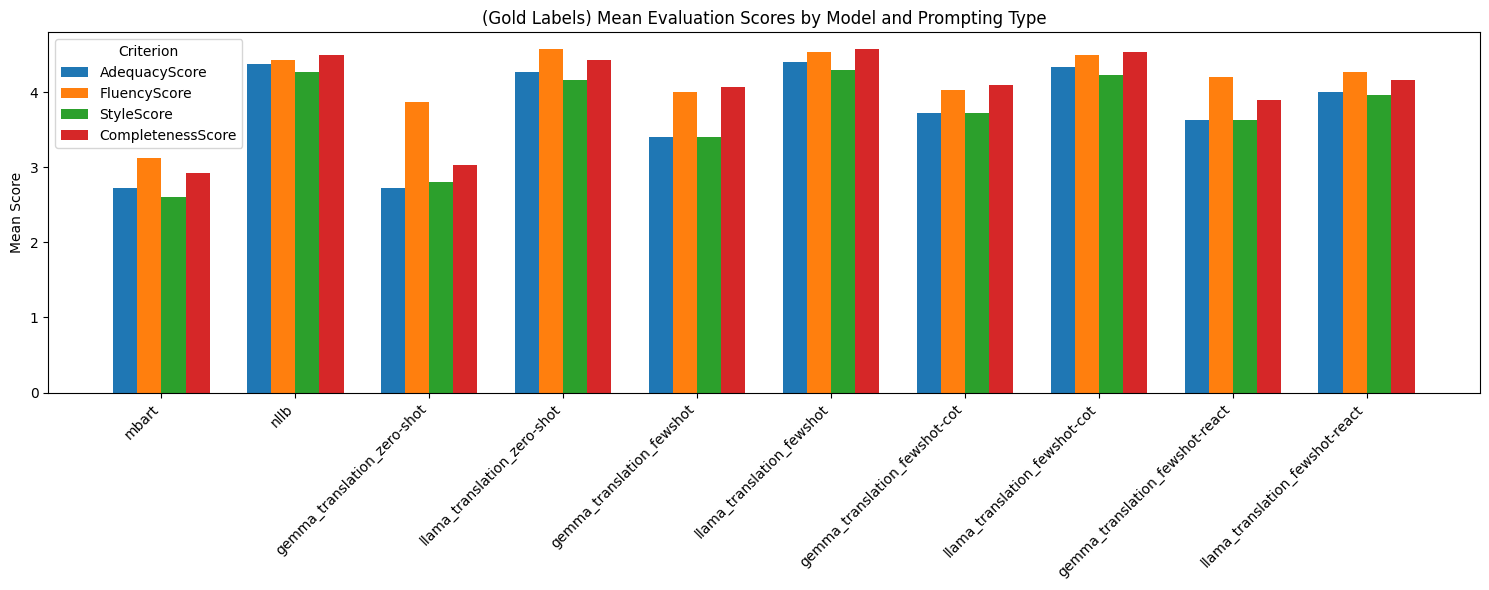

In [7]:
# List of models and prompting types to look for (keys for gold label scores)
fields = [
    "mbart_gold_label_scores",
    "nllb_gold_label_scores",
    "gemma_translation_zero-shot_gold_label_scores",
    "llama_translation_zero-shot_gold_label_scores",
    "gemma_translation_fewshot_gold_label_scores",
    "llama_translation_fewshot_gold_label_scores",
    "gemma_translation_fewshot-cot_gold_label_scores",
    "llama_translation_fewshot-cot_gold_label_scores",
    "gemma_translation_fewshot-react_gold_label_scores",
    "llama_translation_fewshot-react_gold_label_scores"
]

# Dictionary to accumulate values: model -> criterion -> list of values
scores = {field: defaultdict(list) for field in fields}

# Load the first 30 lines from the file
with open("gold_labels_first30s.jsonl", "r") as f:
    for i, line in enumerate(f):
        if i >= 30:
            break
        data = json.loads(line)
        for field in fields:
            if field in data and data[field]:
                for k, v in data[field].items():
                    scores[field][k].append(v)

# Calculate means for each model/prompting and criterion
means = {}
for field in fields:
    means[field.replace("_gold_label_scores", "")] = {
        f"{k}Mean": round(sum(vals)/len(vals), 2) if vals else None
        for k, vals in scores[field].items()
    }

# Print the output in the required style
pprint.pprint(means, sort_dicts=False)

# Prepare data for visualization
criteria = ["AdequacyScore", "FluencyScore", "StyleScore", "CompletenessScore"]
model_names = list(means.keys())

# Each row: model, each column: criterion
data = []
for model in model_names:
    row = []
    for crit in criteria:
        row.append(means[model].get(f"{crit}Mean", 0))
    data.append(row)
data = np.array(data)

# Plotting
x = np.arange(len(model_names))
bar_width = 0.18

fig, ax = plt.subplots(figsize=(15, 6))

for i, crit in enumerate(criteria):
    ax.bar(x + i * bar_width, data[:, i], bar_width, label=crit)

ax.set_xticks(x + bar_width * (len(criteria)-1) / 2)
ax.set_xticklabels(model_names, rotation=45, ha='right', fontsize=10)
ax.set_ylabel("Mean Score")
ax.set_title("(Gold Labels) Mean Evaluation Scores by Model and Prompting Type")
ax.legend(title="Criterion")
plt.tight_layout()
plt.show()


### UTILS: ELIMINATE A COLUMN

In [ ]:
input_file = '/Users/alessioborgi/GitHub/AMT-AutomaticMachineTranslation/gold_labels_first30s.jsonl'
output_file = '/Users/alessioborgi/GitHub/AMT-AutomaticMachineTranslation/gold_labels_first30s.jsonl'
key_to_remove = "llama_translation_fewshot-cot"

with open(input_file, "r", encoding="utf-8") as fin, open(output_file, "w", encoding="utf-8") as fout:
    for line in fin:
        data = json.loads(line)
        if key_to_remove in data:
            del data[key_to_remove]
        fout.write(json.dumps(data, ensure_ascii=False) + "\n")

print(f"Done! Saved to {output_file}")


Done! Saved to /Users/alessioborgi/GitHub/AMT-AutomaticMachineTranslation/gold_labels_first30s.jsonl
